In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#load the dataset from kaggle using API 
! kaggle datasets download -d khoongweihao/covid19-xray-dataset-train-test-sets

 97% 82.0M/84.3M [00:04<00:00, 22.6MB/s]
100% 84.3M/84.3M [00:04<00:00, 17.9MB/s]


In [ ]:
#unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/covid19-xray-dataset-train-test-sets.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Convolution2D,MaxPooling2D
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Data augumentation
train_datagen=ImageDataGenerator(
              
            rescale=1./255,
            width_shift_range=0.2,
            height_shift_range=0.3,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            vertical_flip=True,
            # brightness_range=[0.2,1.2]
)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_ds=train_datagen.flow_from_directory(
    directory='/content/xray_dataset_covid19/train',
    class_mode='binary',
    batch_size=32,
    target_size=(224,224)
)
test_ds=train_datagen.flow_from_directory(
    directory='/content/xray_dataset_covid19/test',
    class_mode='binary',
    batch_size=32,
    target_size=(224,224)
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
#CNN model
model= Sequential()

model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(224,224,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32,(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32,(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation ="relu"))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit(
    train_ds,
    steps_per_epoch=len(train_ds),
    epochs=100,
    validation_data=test_ds,
    validation_steps=len(test_ds)
)

Epoch 1/100
5/5 [==============================] - 20s 2s/step - loss: 0.6903 - accuracy: 0.4797 - val_loss: 0.6285 - val_accuracy: 0.7250
Epoch 2/100
5/5 [==============================] - 7s 1s/step - loss: 0.6576 - accuracy: 0.6014 - val_loss: 0.5142 - val_accuracy: 0.8250
Epoch 3/100
5/5 [==============================] - 15s 4s/step - loss: 0.6182 - accuracy: 0.6622 - val_loss: 0.3590 - val_accuracy: 0.9250
Epoch 4/100
5/5 [==============================] - 15s 3s/step - loss: 0.6562 - accuracy: 0.6216 - val_loss: 0.3586 - val_accuracy: 0.8500
Epoch 5/100
5/5 [==============================] - 11s 2s/step - loss: 0.6878 - accuracy: 0.5811 - val_loss: 0.5685 - val_accuracy: 0.5250
Epoch 6/100
5/5 [==============================] - 7s 1s/step - loss: 0.5858 - accuracy: 0.7027 - val_loss: 0.3478 - val_accuracy: 0.9000
Epoch 7/100
5/5 [==============================] - 8s 2s/step - loss: 0.4987 - accuracy: 0.7703 - val_loss: 0.2656 - val_accuracy: 0.9500
Epoch 8/100
5/5 [=============

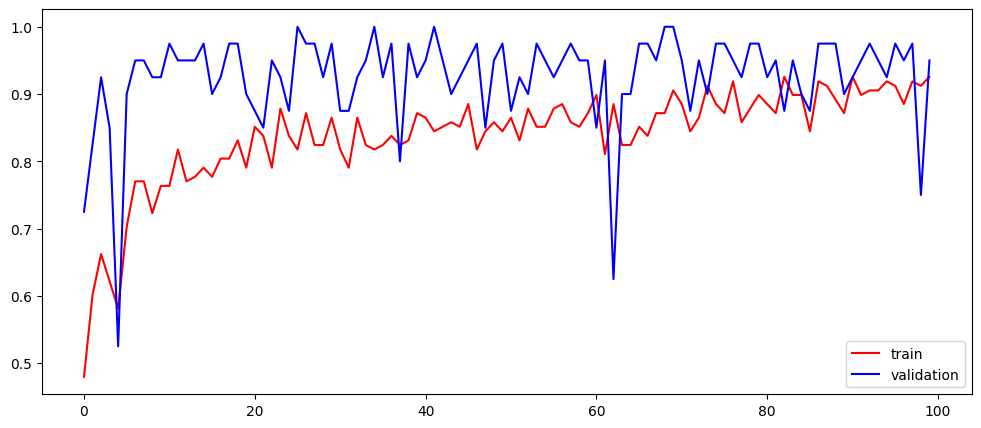

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

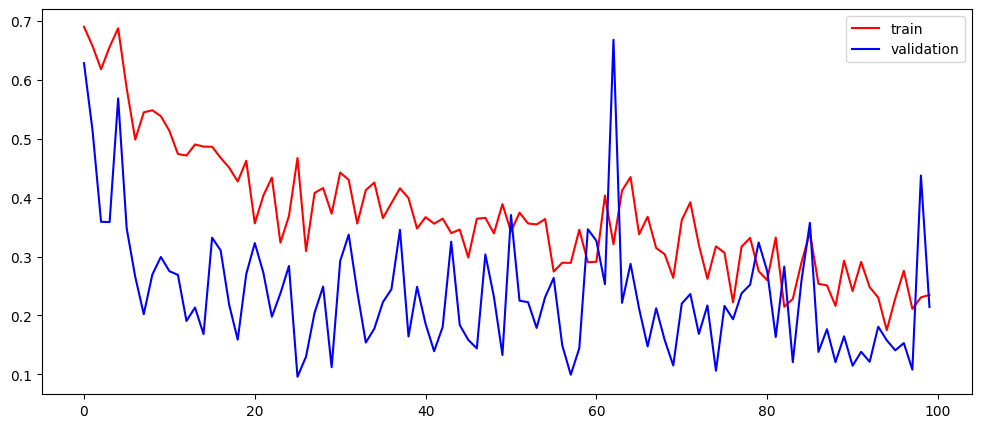

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#accuracy
model.evaluate(test_ds)

2/2 [==============================] - 1s 213ms/step - loss: 0.1237 - accuracy: 0.9750


[0.12370045483112335, 0.9750000238418579]